In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pickle
from openTSNE import TSNE

import amd
from joblib import Parallel, delayed

from glob import glob

# Relaxed vs unrelaxed structures

In [15]:
def compute_amd_from_cif(cif_path):
    try:
        cif_reader = amd.CifReader(cif_path, reader="pymatgen")
        
        amds = [amd.AMD(crystal, 100) for crystal in cif_reader]
        assert len(amds) == 1

        return amds[0]
    except Exception as e:
        print(f"Error at {cif_path}: {e}")
        return None

In [13]:
with open("features/embeddings/opentsne_embeddings.pkl", "rb") as f:
    embeddings = pickle.load(file = f)

Wed Nov 29 14:38:23 2023 Building and compiling search function


In [ ]:
amds_top_100_relaxed = np.array(Parallel(n_jobs=-1)(delayed(compute_amd_from_cif)(cif_path) for cif_path in glob("top_100_cifs_relaxed/*.cif")))

In [23]:
amds_top_100_unrelaxed = np.array(Parallel(n_jobs=-1)(delayed(compute_amd_from_cif)(cif_path) for cif_path in glob("top_100_cifs_unrelaxed/*.cif")))

In [38]:
embeddings_relaxed = embeddings.transform(amds_top_100_relaxed)

===> Finding 15 nearest neighbors in existing embedding using NN Descent approxmimate search...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 1050.7578, 50 iterations in 78.3904 sec
Iteration  100, KL divergence 1050.6968, 50 iterations in 78.1148 sec
Iteration  150, KL divergence 1050.6969, 50 iterations in 78.1271 sec
Iteration  200, KL divergence 1050.6969, 50 iterations in 78.1992 sec
Iteration  250, KL divergence 1050.6969, 50 iterations in 77.7639 sec
   --> Time elapsed: 390.60 seconds


In [39]:
embeddings_unrelaxed = embeddings.transform(amds_top_100_unrelaxed)

===> Finding 15 nearest neighbors in existing embedding using NN Descent approxmimate search...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 1012.4571, 50 iterations in 77.7478 sec
Iteration  100, KL divergence 1009.8028, 50 iterations in 77.7232 sec
Iteration  150, KL divergence 1009.7856, 50 iterations in 77.7962 sec
Iteration  200, KL divergence 1009.7855, 50 iterations in 78.0913 sec
Iteration  250, KL divergence 1009.7855, 50 iterations in 77.4935 sec
   --> Time elapsed: 388.85 seconds


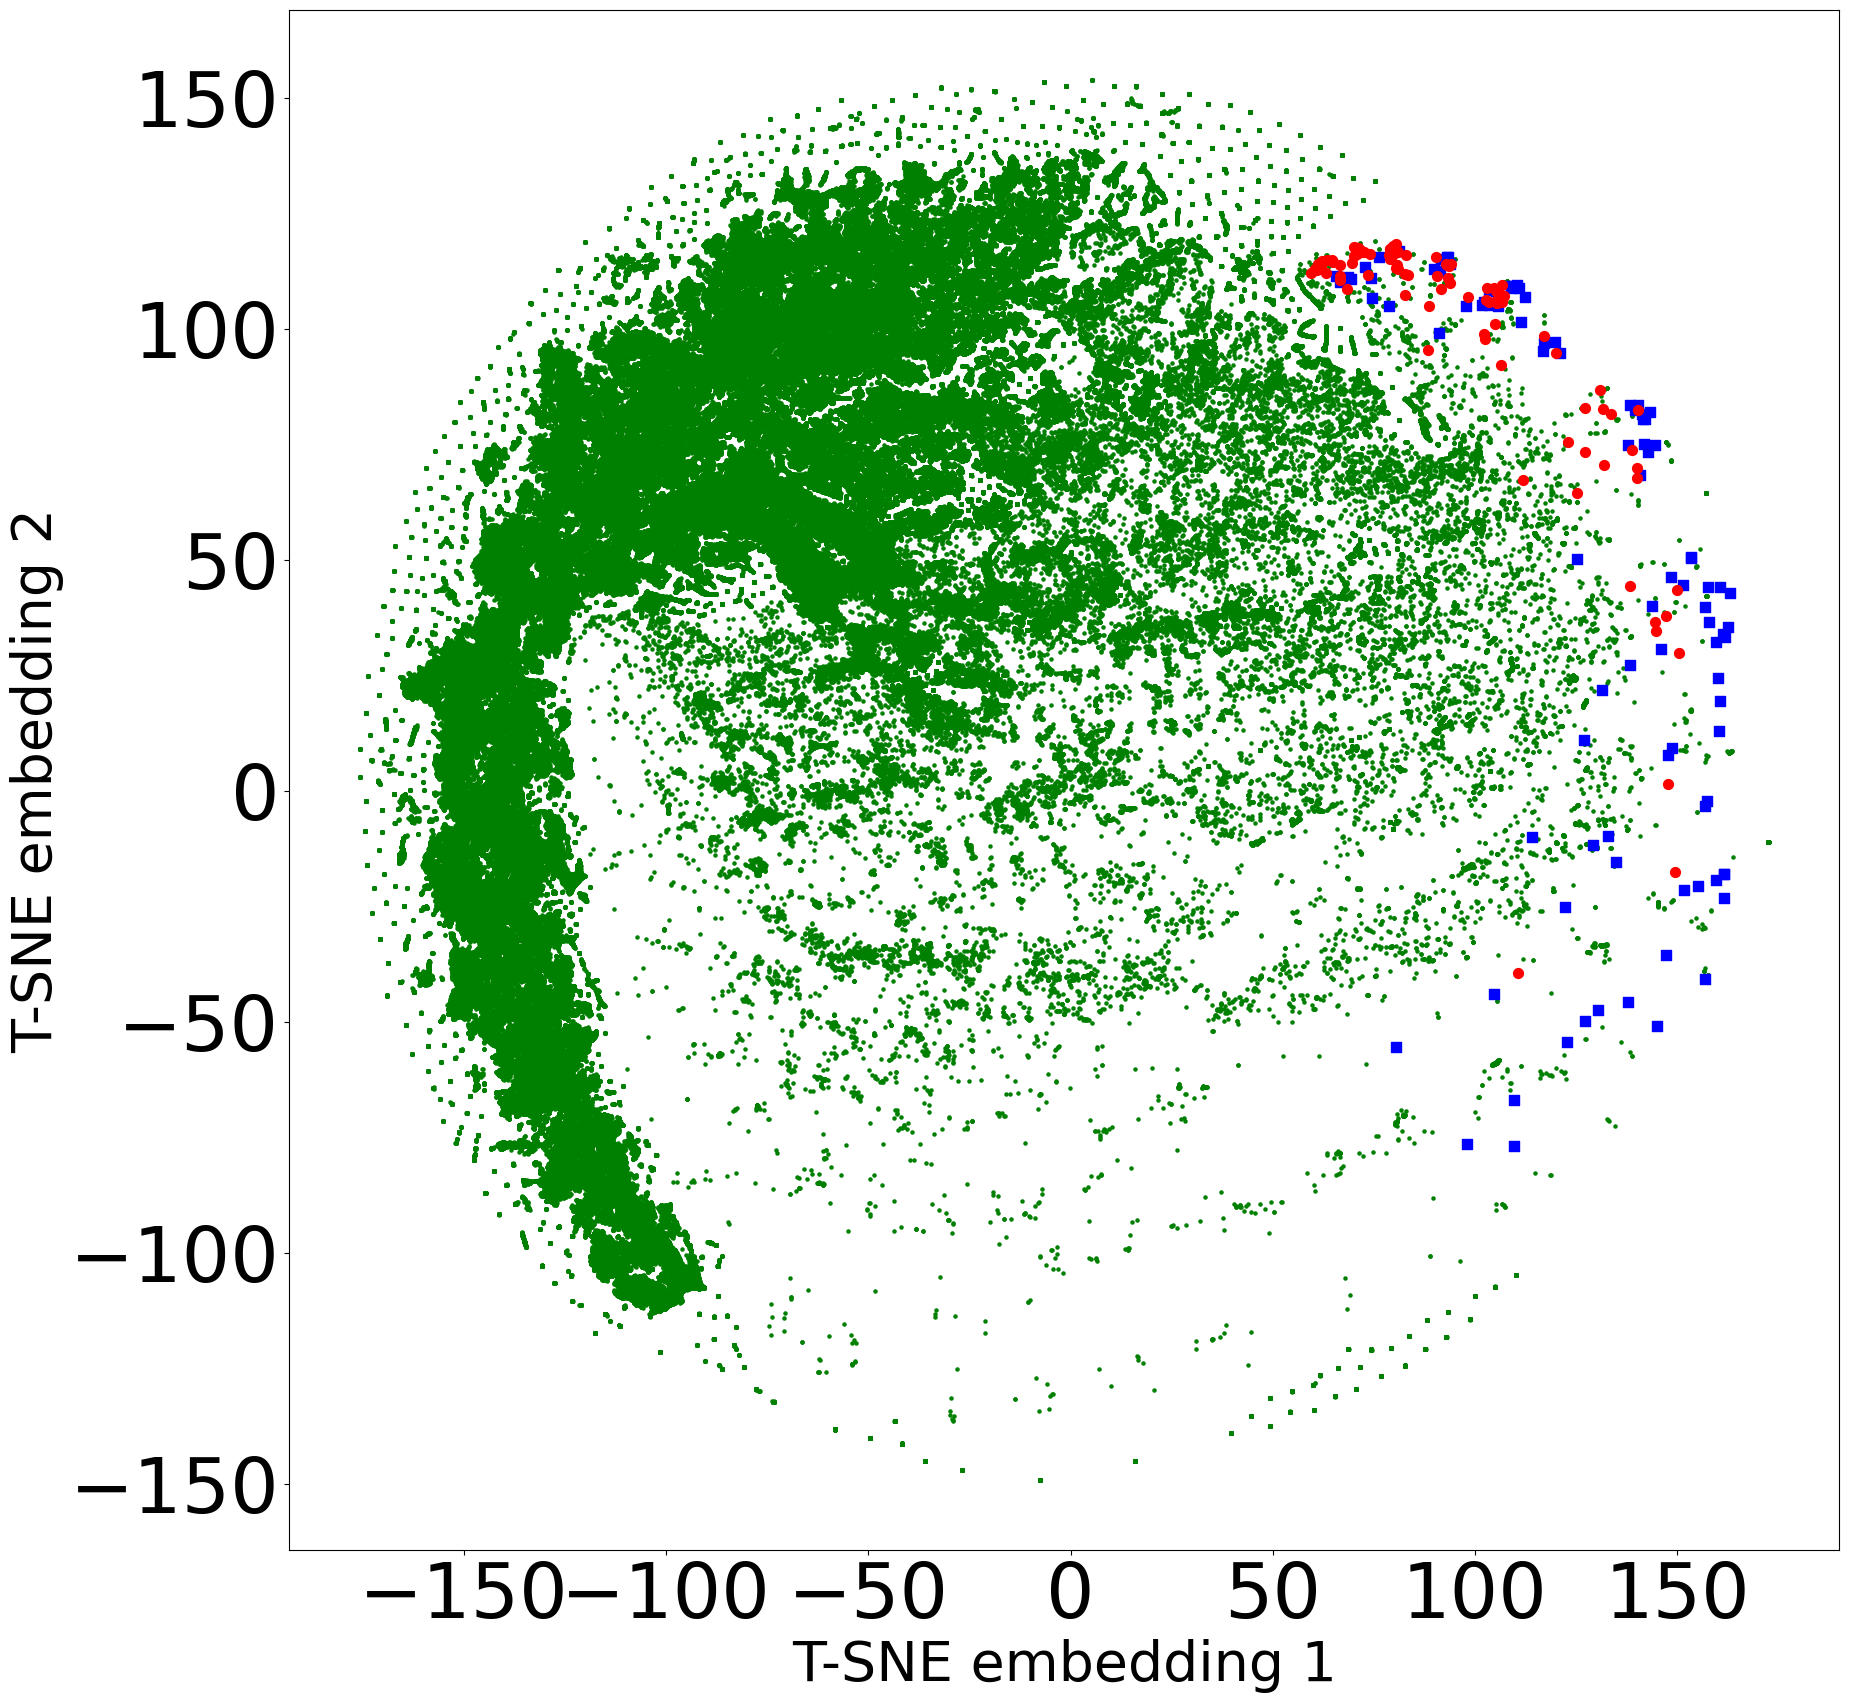

In [55]:
plt.figure(figsize=(20,20))
plt.xticks(fontsize=55)
plt.xlabel("T-SNE embedding 1", fontsize = 40)
plt.yticks(fontsize=55)
plt.ylabel("T-SNE embedding 2", fontsize = 40)

plt.scatter(x = arcmof_embeddings[:,0], 
            y = arcmof_embeddings[:,1], 
            s=5, marker="o", color="green", zorder = 1)

# plt.scatter(x = [x[0][0] for x in matgfn_embeddings_with_scaled_reward], 
#             y = [x[0][1] for x in matgfn_embeddings_with_scaled_reward],
#             c = [x[1] for x in matgfn_embeddings_with_scaled_reward],
#             s=0.5, marker="o", cmap=colormaps["YlOrRd"], zorder=2)

plt.scatter(x = embeddings_relaxed[:,0],
            y = embeddings_relaxed[:,1],
            s=50, marker = "s", color = "blue", zorder=2)

plt.scatter(x = embeddings_unrelaxed[:,0],
            y = embeddings_unrelaxed[:,1],
            s=50, marker = "o", color = "red", zorder=2)